In [1]:
import numpy as np

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [25]:
templates_solvent_additive = {
    "cyclic_carbonate": "[1*]C([2*])1C([3*])([4*])OC(=O)O1",
    "linear_carbonate": "[1*]OC(=O)O[2*]",
    "glyme": "C([1*])([2*])([3*])OC([4*])([5*])C([6*])([7*])OC([8*])([9*])([10*])",
    "carboxylate": "C([1*])([2*])([3*])OC(=O)[4*]",
    "thf": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])OC([7*])([8*])1",
    "cyclic_sulfate": "C([1*])([2*])1C([3*])([4*])OS(=O)(=O)O1", 
    "sulfone": "[1*]S(=O)(=O)[2*]",
    "sultone": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])S(=O)(=O)OC([7*])([8*])1",
    "sulfite_ester": "[1*]OS(=O)O[2*]",
    "cyclic_sulfite_ester": "C1([1*])([2*])OS(=O)OC([3*])([4*])C([5*])([6*])C1([7*])([8*])",
    "sulfonyl_fluoride": "[1*]S(F)(=O)=O",
    "sulfamoyl_fluoride": "N([1*])([2*])S(=O)(=O)F",
    "dinitrile": "N#CC([1*])([2*])C([3*])([4*])C#N",
    "carbamate": "[1*]OC(=O)N([2*])([3*])",
    "methoxyalkylamine": "C([3*])([4*])([5*])OC([6*])([7*])C([8*])([9*])N([1*])([2*])",
    "phosphine": "P([1*])([2*])([3*])",
    "phosphorane": "P([1*])([2*])([3*])([4*])([5*])",
    "organophosphate": "P(=O)(O[1*])(O[2*])(O[3*])",
    "silane": "[Si]([1*])([2*])([3*])([4*])",
    "siloxane": "O([Si]([1*])([2*])[3*])[Si]([4*])([5*])[6*]",
    "borane": "B([1*])([2*])[3*]",
    "boroxine": "O1B([1*])OB([2*])OB([3*])1",
    "maleic_anhydride": "C1([1*])=C([2*])C(=O)OC1=O",
    "lactone": "C1([3*])([4*])C([1*])([2*])C(=O)OC([5*])([6*])1",
    "lactam": "C1([3*])([4*])C([1*])([2*])C(=O)NC([5*])([6*])1",

}

templates_ions = {
    "sulfonylimide": "[1*]S(=O)(=O)[N-]S(=O)(=O)[2*]",
    "organosulfate": "O=S(=O)([O-])O[1*]",
    "cyclic_borate": "O1C([3*])([4*])C(O[B-]([1*])([2*])1)([5*])([6*])",
    "cyclic_aluminate": "O1C([3*])([4*])C(O[Al-]([1*])([2*])1)([5*])([6*])",
    "cyclic_phosphate": "O1C([5*])([6*])C(O[P-]([1*])([2*])([3*])([4*])1)([7*])([8*])",
}

templates_redox_flow = {
    "anthraquinone": "O=C1c2c([1*])c([2*])c([3*])c([4*])c2C(=O)c3c([5*])c([6*])c([7*])c([8*])c13",
    "naphthoquinone": "O=C1c2c([1*])c([2*])c([3*])c([4*])c2C(=O)c([5*])c([6*])1",
    "benzoquinone": "C1([1*])=C([2*])C(=O)C([3*])=C([4*])C1=O",
    "tempo": "CC1(CC([1*])([2*])CC(N1[O])(C)C)C",
    "phthalimide": "O=C2c1c([2*])c([3*])c([4*])c([5*])c1C(=O)N([1*])2",
    "viologen": "[1*][n+]1ccc(cc1)c2cc[n+](cc2)[2*]",
    "quinoxaline": "c([1*])1c([2*])c([3*])c([4*])c2nc([5*])c([6*])nc12",
    "tetrazine": "C([1*])1=NN=C([2*])N=N1",
    "benzothiadizaole": "C([1*])1=C([2*])C2=NSN=C2C([3*])=C([4*])1",
    "pyridine_ester": "c(C(=O)(O[1*]))1c([2*])c([3*])[n+]([4*])c([5*])c([6*])1",
    "cyclopropenium": "[C+](N([1*])([2*]))2C(N([3*])([4*]))=C(N([5*])([6*]))2",
    "ptio": "[1*]C1(C([N+](=C(N1[O])C2=C([2*])C([3*])=C([4*])C([5*])=C([6*])2)[O-])([7*])[8*])[9*]",
    "phenothiazine": "c([4*])1c([3*])c([2*])c2c(c1([5*]))N([1*])c3c([6*])c([7*])c([8*])c([9*])c3S2",
    "tetrathiofulvene": "C([1*])1=C([2*])SC(=C2SC([3*])=C([4*])S2)S1",
    
}

templates_ilesw_cation = {
    "sulphonium": "[S+]([1*])([2*])([3*])",
    "ammonium": "[N+]([1*])([2*])([3*])([4*])",
    "phosphonium": "[P+]([1*])([2*])([3*])([4*])",
    "tetrazolium": "c([3*])1nnn([1*])[n+]([2*])1",
    "triazolium": "c([3*])1n([1*])nc([4*])[n+]([2*])1",
    "guanidinium": "N([1*])([2*])C(=[N+]([3*])([4*]))N([5*])([6*])",
    "imidazolium": "c([1*])1n([2*])c([3*])c([4*])[n+]([5*])1",
    "pyridazinium": "c([1*])1c([2*])c([3*])n[n+]([4*])c([5*])1",
    "122-triazole": "[N+]([1*])([2*])=c1n([3*])n([4*])c([5*])n1",
    "thiazolium": "C([1*])([2*])1C([3*])([4*])SC([5*])=[N+]([6*])1",
    "pyridinium": "c([1*])1c([2*])c([3*])c([4*])[n+]([5*])c([6*])1",
    "pyrroline": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])C([7*])=[N+]([8*])1",
    "oxazolidinium": "C([1*])([2*])1OC([3*])([4*])C([5*])([6*])[N+]([7*])([8*])1",
    "imidazolidine": "[N+]([1*])([2*])=C1N([3*])C([4*])([5*])C([6*])([7*])N([8*])1",
    "pyrrolidinium": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])C([7*])([8*])[N+]([9*])([10*])1",
    "oxadiazine": "[N+]([1*])([2*])=C1N([3*])C([4*])([5*])OC([6*])([7*])N([8*])1",
    "morpholinium": "C([1*])([2*])1C([3*])([4*])OC([5*])([6*])C([7*])([8*])[N+]([9*])([10*])1",
    "piperazinium": "C([1*])([2*])1C([3*])([4*])N([5*])C([6*])([7*])C([8*])([9*])[N+]([10*])([11*])1",
    "pyrimidine": "[N+]([1*])([2*])=C1N([3*])C([4*])([5*])C([6*])([7*])C([8*])([9*])N([10*])1",
    "piperidinium": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])C([7*])([8*])[N+]([9*])([10*])C([11*])([12*])1",
    "iosquinolinium": "c([1*])1c([2*])c([3*])c2c(c([4*])1)c([5*])[n+]([6*])c([7*])c([8*])2"
}

templates_ilesw_anion = {
    "azanide": "[N-]([1*])([2*])",
    "methanide": "[C-]([1*])([2*])([3*])",
    "methanoate": "[O-]C([1*])=O",
    "tetrahydroborate": "[B-]([1*])([2*])([3*])([4*])",
    "tetrahydroaluminate": "[Al-]([1*])([2*])([3*])([4*])",
    "tetrahydrogalldate": "[Ga-]([1*])([2*])([3*])([4*])",
    "tetrahydroindate": "[In-]([1*])([2*])([3*])([4*])",
    "hydrogen_sulfite": "[O-]S([1*])(=O)=O",
    "glycinate": "[O-]C(=O)C([1*])([2*])N([3*])([4*])",
    "hexahydrophosphate": "[P-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroarsenate": "[As-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroniobate": "[Nb-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroantimonate": "[Sb-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "acetate": "[O-]C(=O)[1*]",
    "hexahydrotantalate": "[Ta-]([1*])([2*])([3*])([4*])([5*])([6*])"
}

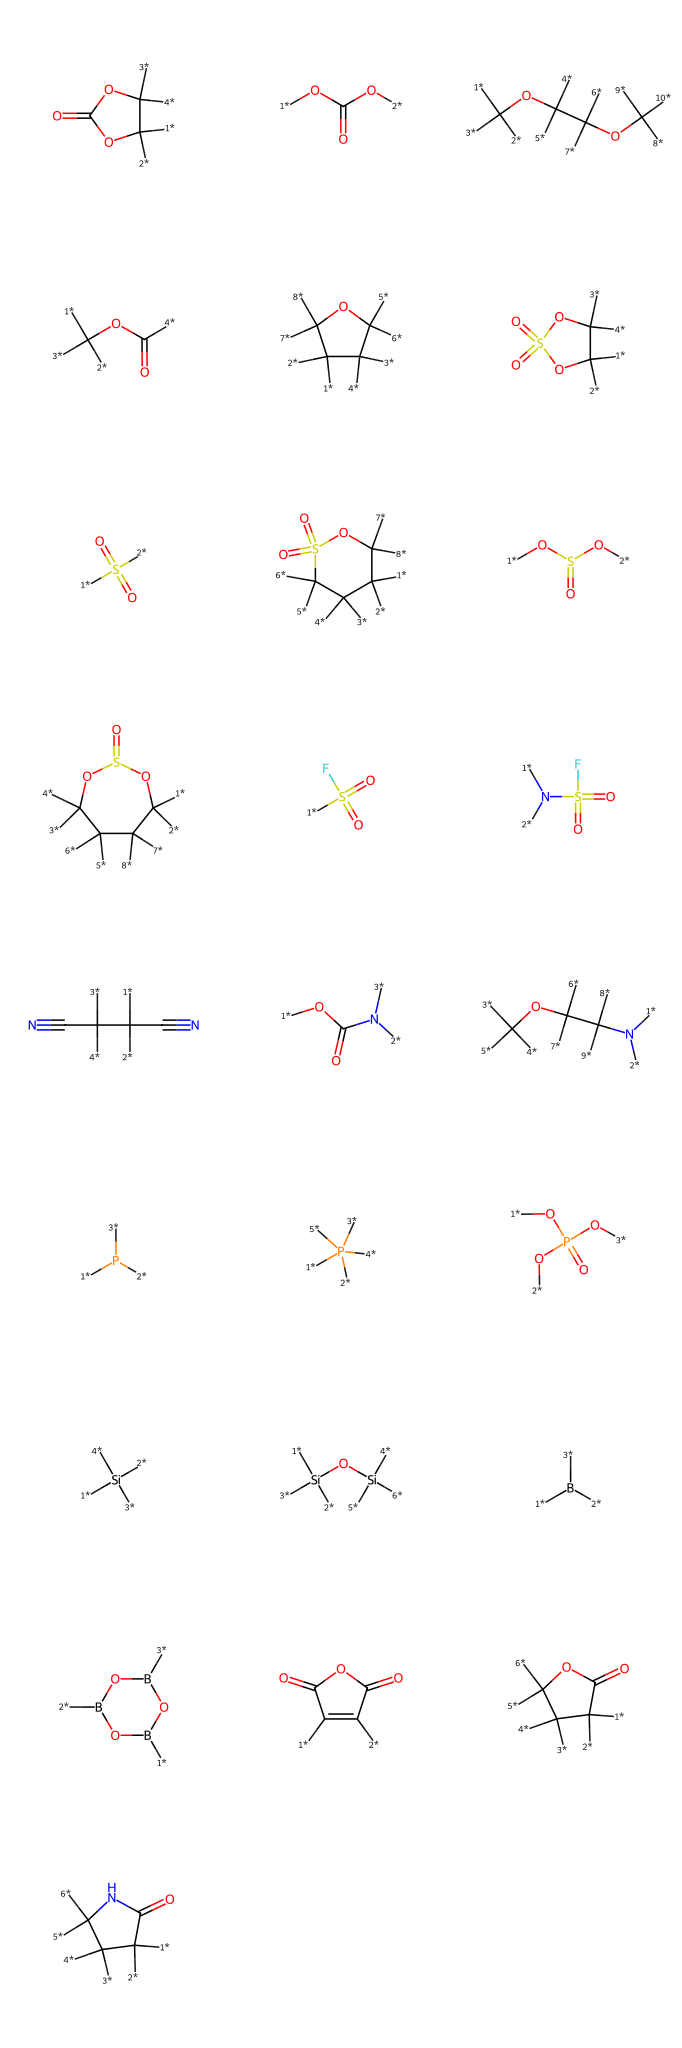

In [5]:
solvent_smiles = list()
for v in templates_solvent_additive.values():
    solvent_smiles.append(v)

solvent_mols = [Chem.MolFromSmiles(x) for x in solvent_smiles]
Chem.Draw.MolsToGridImage(solvent_mols, subImgSize=(300, 300))

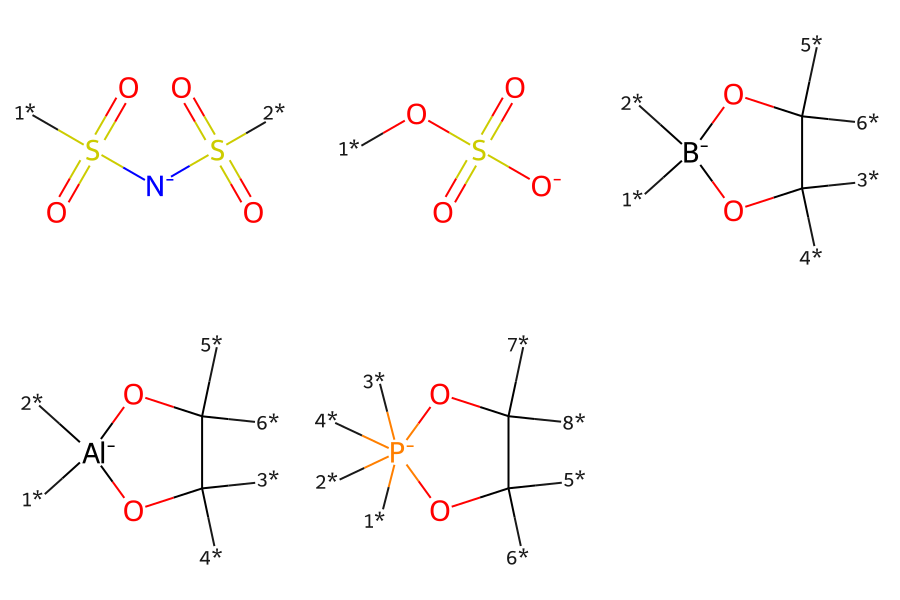

In [6]:
ion_smiles = list()
for v in templates_ions.values():
    ion_smiles.append(v)

ion_mols = [Chem.MolFromSmiles(x) for x in ion_smiles]
Chem.Draw.MolsToGridImage(ion_mols, subImgSize=(300, 300))

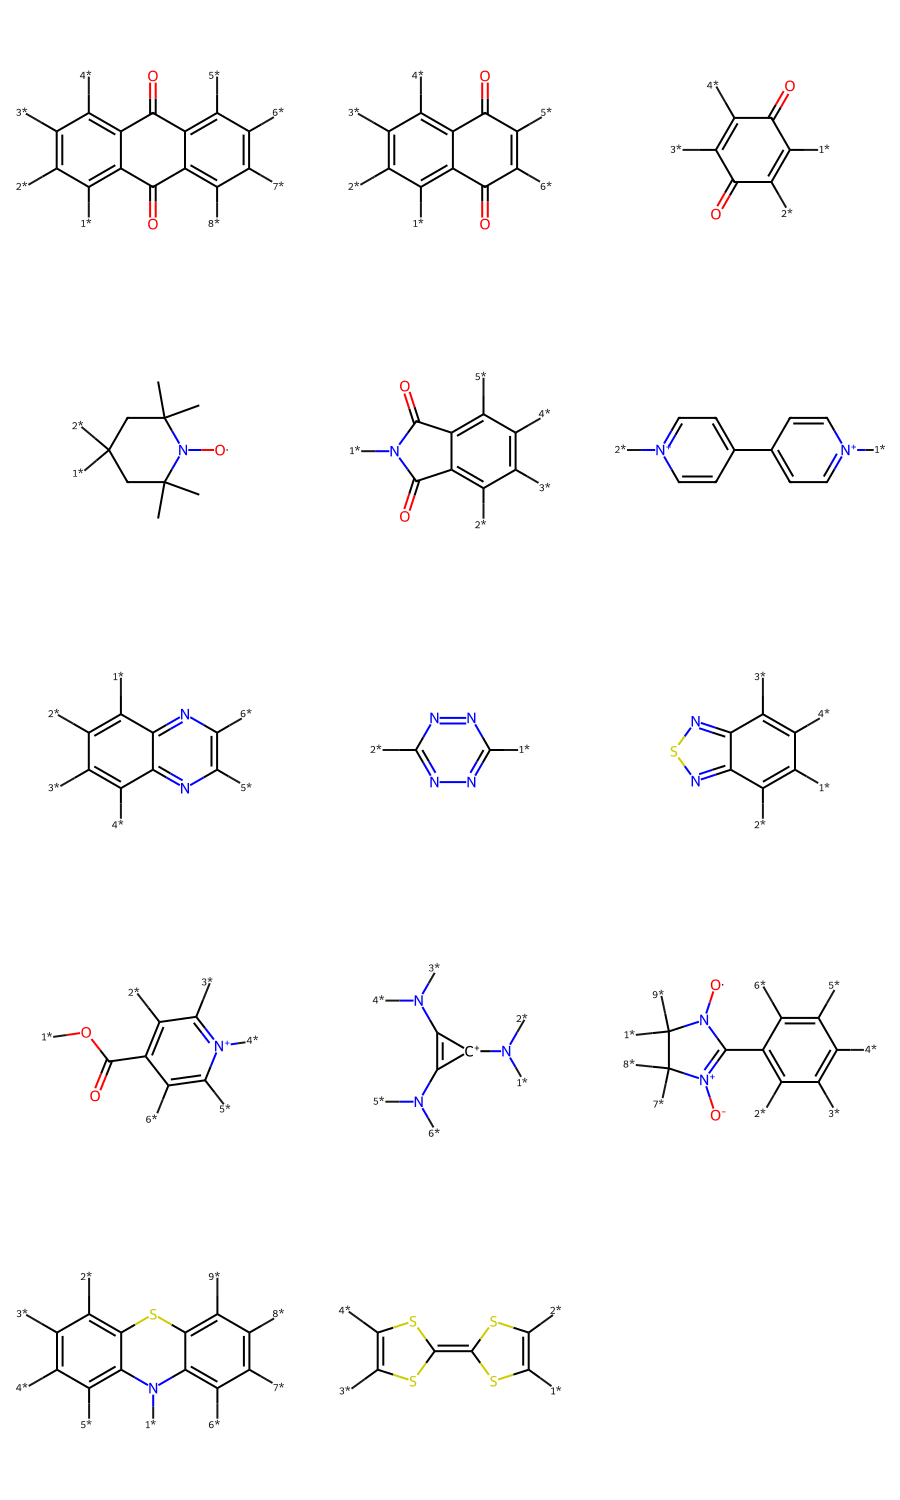

In [26]:
redox_smiles = list()
for v in templates_redox_flow.values():
    redox_smiles.append(v)

redox_mols = [Chem.MolFromSmiles(x) for x in redox_smiles]
Chem.Draw.MolsToGridImage(redox_mols, subImgSize=(300, 300))

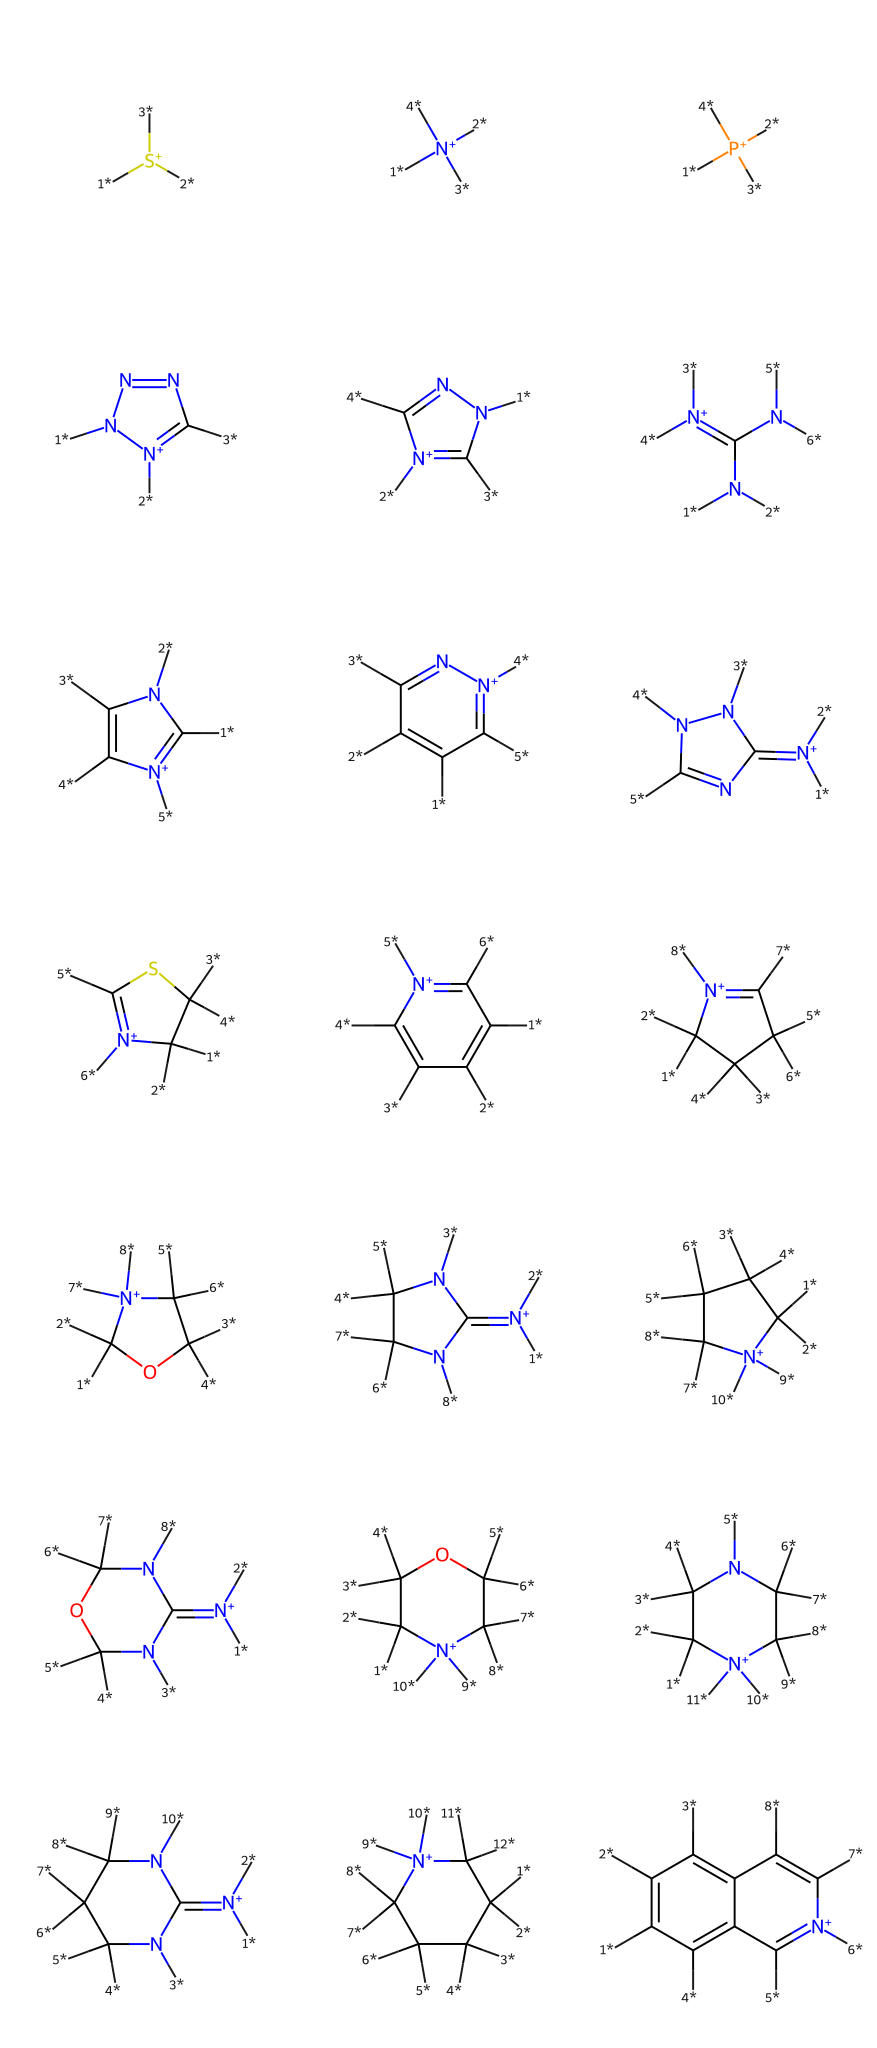

In [8]:
cation_smiles = list()
for v in templates_ilesw_cation.values():
    cation_smiles.append(v)

cation_mols = [Chem.MolFromSmiles(x) for x in cation_smiles]
Chem.Draw.MolsToGridImage(cation_mols, subImgSize=(300, 300))

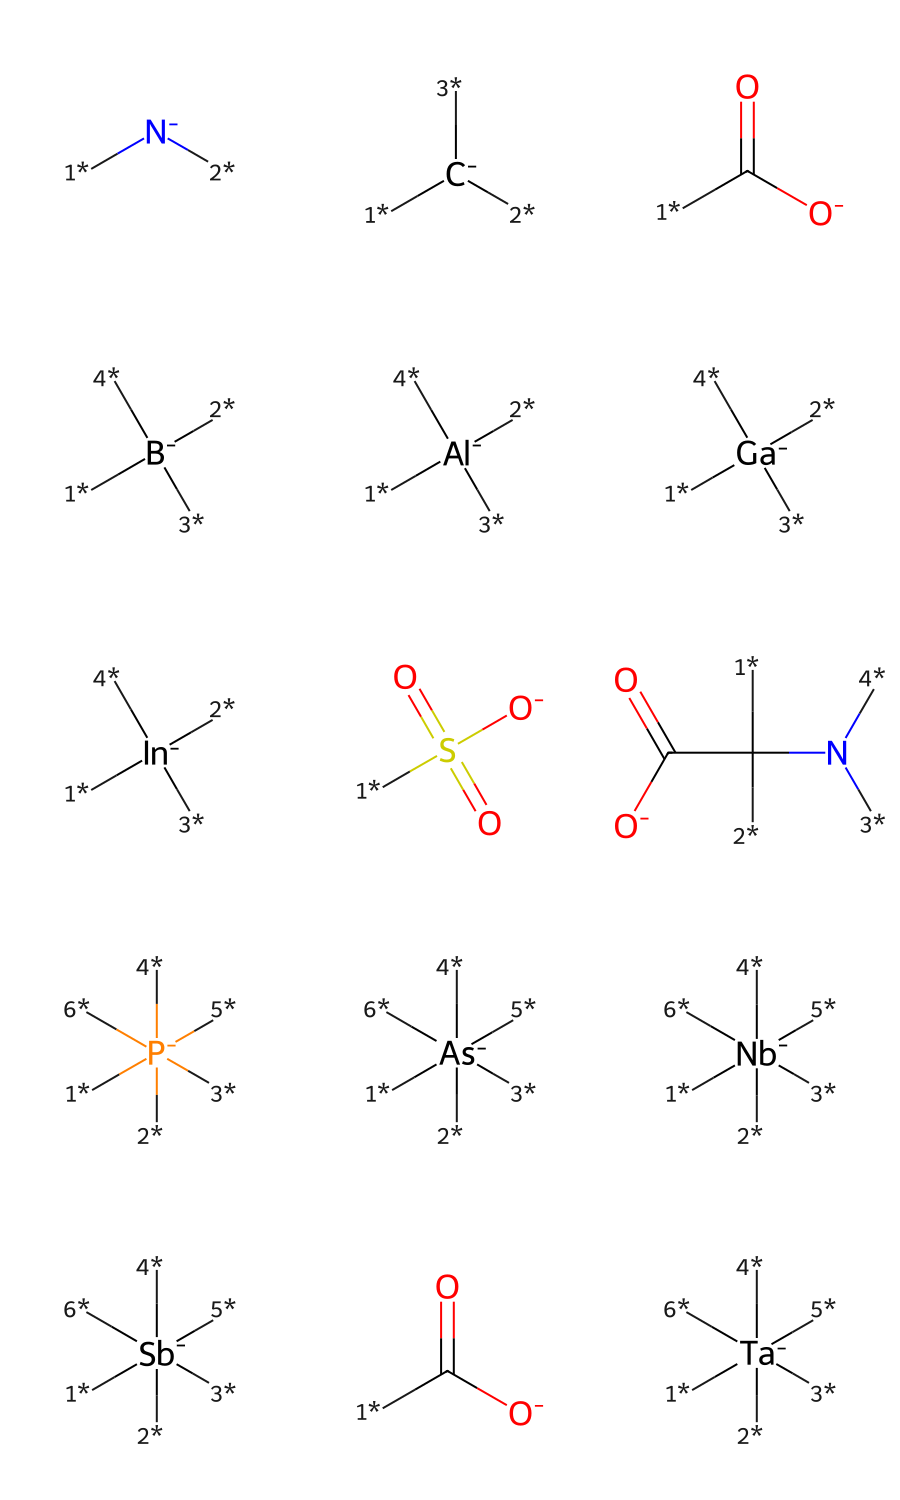

In [9]:
anion_smiles = list()
for v in templates_ilesw_anion.values():
    anion_smiles.append(v)

anion_mols = [Chem.MolFromSmiles(x) for x in anion_smiles]
Chem.Draw.MolsToGridImage(anion_mols, subImgSize=(300, 300))

In [85]:
substituents = [
    'B(O)C',
    'B(O)CC',
    'B(O)N',
    'B(O)N(C)(C)',
    'B(O)O',
    'B(OC)O',
    'B(OCC)O',
    'Br',
    'C',
    'C#C',
    'C(=O)C(C(C(C(=O)O)(F)F)(F)F)(F)F',
    'C(=O)NC(=O)F',
    'C(Br)=C(Br)C',
    'C(Br)C(Br)C',
    'C(Br)CC',
    'C(C)CC',
    'C(C)CCC',
    'C(CC[Si](c1ccccc1)(C)C)(F)F',
    'C(Cl)=C(Cl)C',
    'C(Cl)C(Cl)C',
    'C(Cl)CC',
    'C(F)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)F',
    'C(F)(C(C(C(F)(F)F)(F)F)(F)F)F',
    'C(F)(C(C(F)(F)F)(F)F)F',
    'C(F)(C(F)(F)F)F',
    'C(F)(C(F)F)F',
    'C(F)(F)(F)',
    'C(F)C',
    'C(F)CC',
    'C(I)=C(I)C',
    'C(I)C(I)C',
    'C(I)CC',
    'C([O-])(=O)',
    'C(c1cccc(c1)C(F)(F)F)(F)F',
    'C=C',
    'CB(O)O',
    'CC',
    'CC#C',
    'CC(=N)',
    'CC(=N)C',
    'CC(=O)Br',
    'CC(=O)Cl',
    'CC(=O)F',
    'CC(=O)I',
    'CC(=O)N(C)(C)',
    'CC(=O)O',
    'CC(=O)OC(=O)C',
    'CC(=O)c1ccccc1',
    'CC(Br)C',
    'CC(C(F)(F)F)O',
    'CC(C)C',
    'CC(CN)O',
    'CC(Cl)C',
    'CC(F)C',
    'CC(I)C',
    'CC(N)(N)N',
    'CC(O)C',
    'CC(OCc1ccccc1)C',
    'CC1CO1',
    'CC=C',
    'CC=O',
    'CCC',
    'CCC(=C(F)F)F',
    'CCC(=O)N',
    'CCC(=O)Nc1ccccc1',
    'CCC(=O)O',
    'CCC(C(Br)(F)F)(Br)F',
    'CCC(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F',
    'CCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F',
    'CCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F',
    'CCC(C(C(C(S(F)(F)(F)(F)F)(F)F)(F)F)(F)F)(F)F',
    'CCC(C(S(F)(F)(F)(F)F)(F)F)(F)F',
    'CCC(C)C',
    'CCC(CCC=C(C)C)C',
    'CCC(F)(F)F',
    'CCCBr',
    'CCCC',
    'CCCC#C',
    'CCCC(=O)O',
    'CCCC(=O)OCC',
    'CCCC(C(F)(F)F)(F)F',
    'CCCCC',
    'CCCCC(C(S(F)(F)(F)(F)F)(F)F)(F)F',
    'CCCCCC',
    'CCCCCCC',
    'CCCCCCCC',
    'CCCCCCCCC',
    'CCCCCCCCCC',
    'CCCCCCCCCCC',
    'CCCCCCCCCCCC',
    'CCCCCCCCCCCCC',
    'CCCCCCCCCCCCCC',
    'CCCCCCCCCCCCCCC',
    'CCCCCCCCCCCCCCCC',
    'CCCCCCCCCCCCCCCCCC',
    'CCCCCCCCCCCCCCCCCCCC',
    'CCCCCCCCCCCCOC',
    'CCCCCCCCCCCCn1cccc1',
    'CCCCCCCCCCCOC',
    'CCCCCCCCCCOC',
    'CCCCCCCCCOC',
    'CCCCCCCCOC',
    'CCCCCCCCOC(=O)C',
    'CCCCCCCC[Si](c1ccccc1)(C)C',
    'CCCCCCCOC',
    'CCCCCCCSc1nnco1',
    'CCCCCCOC',
    'CCCCCCOC(=O)C',
    'CCCCCCOC(=O)C=C',
    'CCCCCN',
    'CCCCCOC',
    'CCCCCOC(=O)C',
    'CCCCCOCC',
    'CCCCN',
    'CCCCN(C(=O)C)C',
    'CCCCN(C(=S)SCCC)CCCC',
    'CCCCNC(=N)N',
    'CCCCNC(=O)C',
    'CCCCO',
    'CCCCOC',
    'CCCCOC(=O)C',
    'CCCCOC=O',
    'CCCCS(=O)(=O)Cl',
    'CCCCS(=O)(=O)O',
    'CCCCSc1nnco1',
    'CCCCl',
    'CCCCn1cccc1',
    'CCCF',
    'CCCI',
    'CCCN',
    'CCCNCc1ccccc1O',
    'CCCO',
    'CCCOC',
    'CCCOC(=O)C',
    'CCCP(=O)(OCC)OCC',
    'CCCS',
    'CCCS(=O)(=O)O',
    'CCCSC(=S)N(CC)CC',
    'CCCSC(=S)N(CCCCCCCC)CCCCCCCC',
    'CCCSC(=S)N(c1ccccc1)c1ccccc1',
    'CCCSC(=S)N1CCOCC1',
    'CCCSC(=S)n1cncc1',
    'CCCc1ccccc1',
    'CCF',
    'CCN',
    'CCN(C(=O)C)CC',
    'CCO',
    'CCOC(=O)C',
    'CCOC(=O)CC',
    'CCOC=O',
    'CCOCC',
    'CCOCC(C(C(C(F)F)(F)F)(F)F)(F)F',
    'CCOCC(F)(F)F',
    'CCOCCOc1ccc(cc1)C(CC(C)(C)C)(C)C',
    'CCO[Si](C)(C)C',
    'CCP(=O)(OCC)OCC',
    'CCSc1nnco1',
    'CCc1ccccc1',
    'CN',
    'CNC',
    'COC',
    'COC(=O)C',
    'COC(F)(F)F',
    'COCC',
    'COCCC',
    'COCCOCC',
    'COCCOCCOCC',
    'COCOCCO',
    'CON=O',
    'COO',
    'CO[N+](=O)[O-]',
    'COc1cc(C)ccc1C(C)C',
    'COc1ccccc1',
    'CP(=O)(O)O',
    'CS(=O)=O',
    'CSCC',
    'Cc1ccc(cc1)C',
    'Cc1cccc(c1)C',
    'Cc1ccccc1',
    'Cc1ccccc1C',
    'Cl',
    'F',
    'I',
    'N',
    'N(C(=O)C)C(=O)C',
    'N(C(=O)F)C(=O)F',
    'N(C)C(=O)C',
    'N(O)O',
    'N=C(C)(C)',
    'N=C=O',
    'N=C=S',
    'NCC',
    'NCCC',
    'NCCCC',
    'NNN',
    'O',
    'OB(O)(O)',
    'OC#N',
    'OCC',
    'OCC(C(C)C)C',
    'OCC(CC(C)C)C',
    'OCC(O)C',
    'OCCC',
    'OCCCC',
    'OCCNCC(O)C',
    'OCCOCC',
    'ON=O',
    'ONO',
    'O[N+](=O)[O-]',
    'P(=O)(O)O',
    'P(C)C',
    'P(C)CC',
    'P(CC)CC',
    'P(O)Br',
    'P(O)C',
    'P(O)Cl',
    'P(O)I',
    'P(O)N',
    'P(O)O',
    'P=N',
    'P=O',
    'P=S',
    'PP(=O)(O)O',
    'S',
    '[O]C(=O)c1ccccc1',
    '[S](=O)(=O)(C(F)(F)(C(F)(F)(F)))',
    '[S](=O)(=O)C',
    '[S](=O)(=O)C(C(C(C(F)(F)F)(F)F)(F)F)(F)F',
    '[S](=O)(=O)C(C(C(F)(F)F)(F)F)(F)F',
    '[S](=O)(=O)C(F)(F)(F)',
    '[S](F)(=O)=O',
    '[S]CC(=O)OCC(OC(=O)CS)C',
    '[Si](C)(C)(C)',
    'c1ccccc1',
    'c1ccccn1',
    'c1cccnc1',
    'c1ccncc1'
]

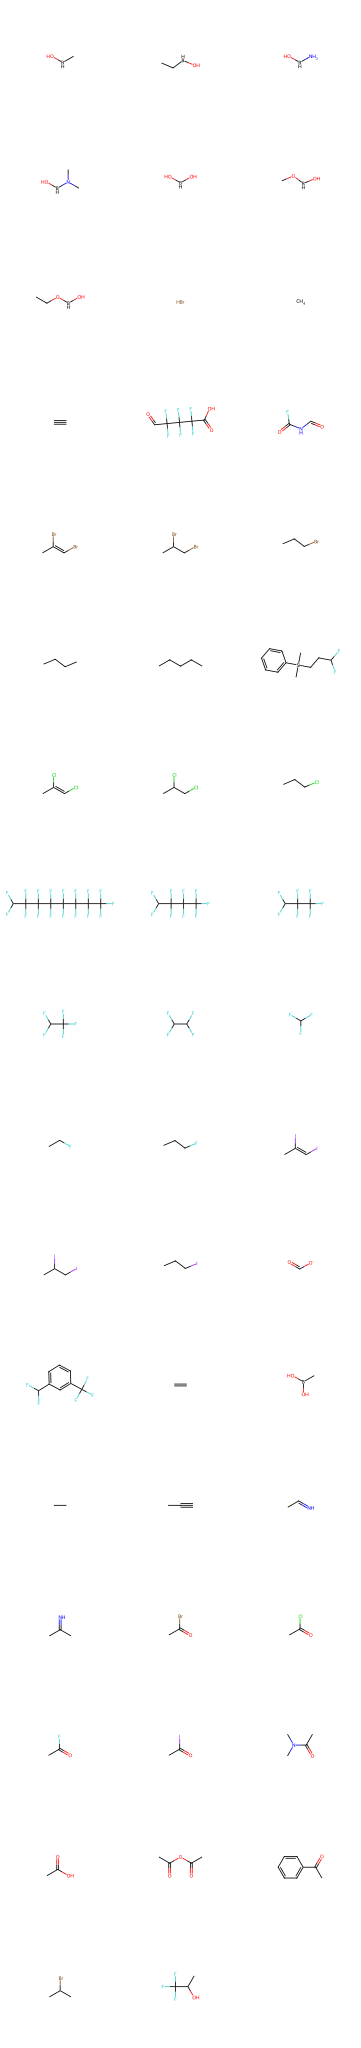

In [86]:
sub_mols = [Chem.MolFromSmiles(x) for x in substituents]
Chem.Draw.MolsToGridImage(sub_mols[:50], subImgSize=(300, 300))

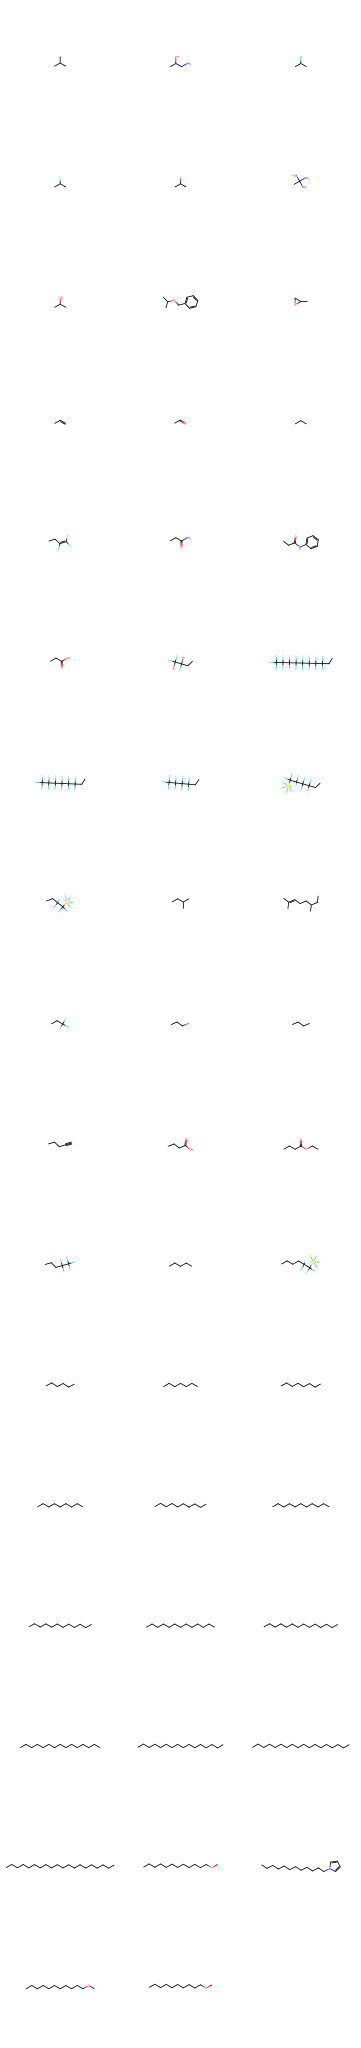

In [87]:
Chem.Draw.MolsToGridImage(sub_mols[50:100], subImgSize=(300, 300))

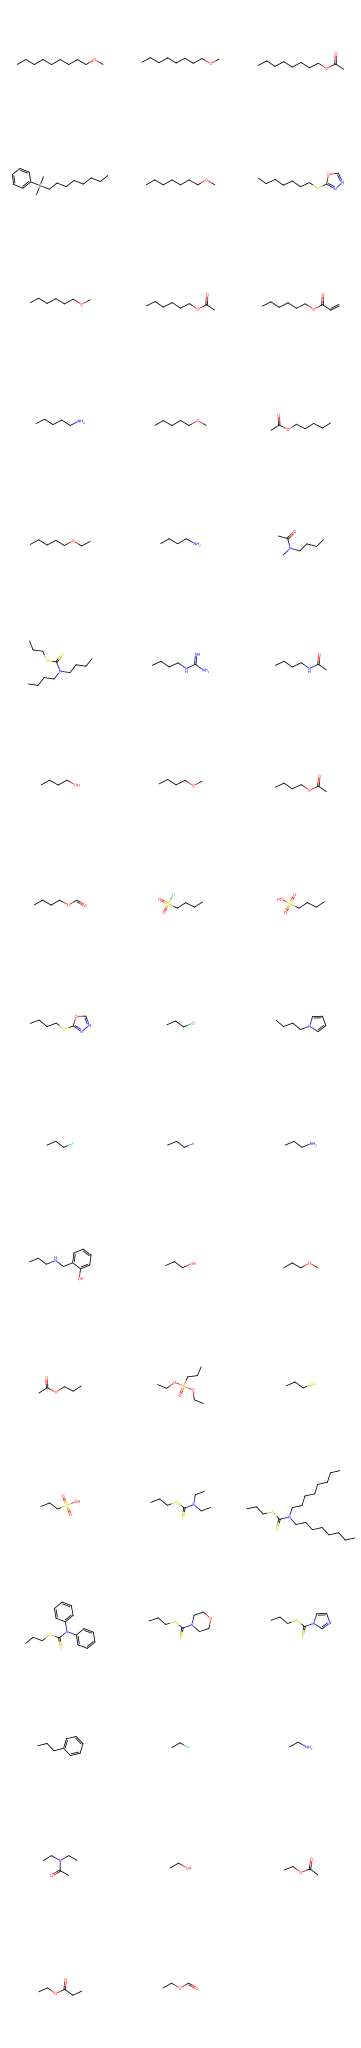

In [88]:
Chem.Draw.MolsToGridImage(sub_mols[100:150], subImgSize=(300, 300))

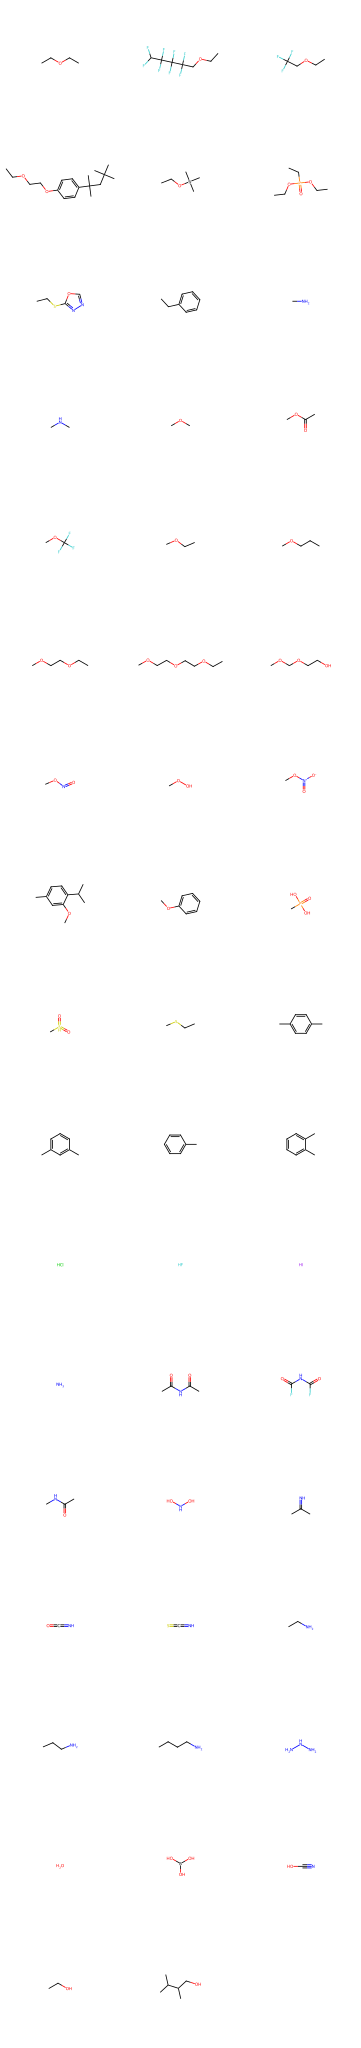

In [90]:
Chem.Draw.MolsToGridImage(sub_mols[150:200], subImgSize=(300, 300))

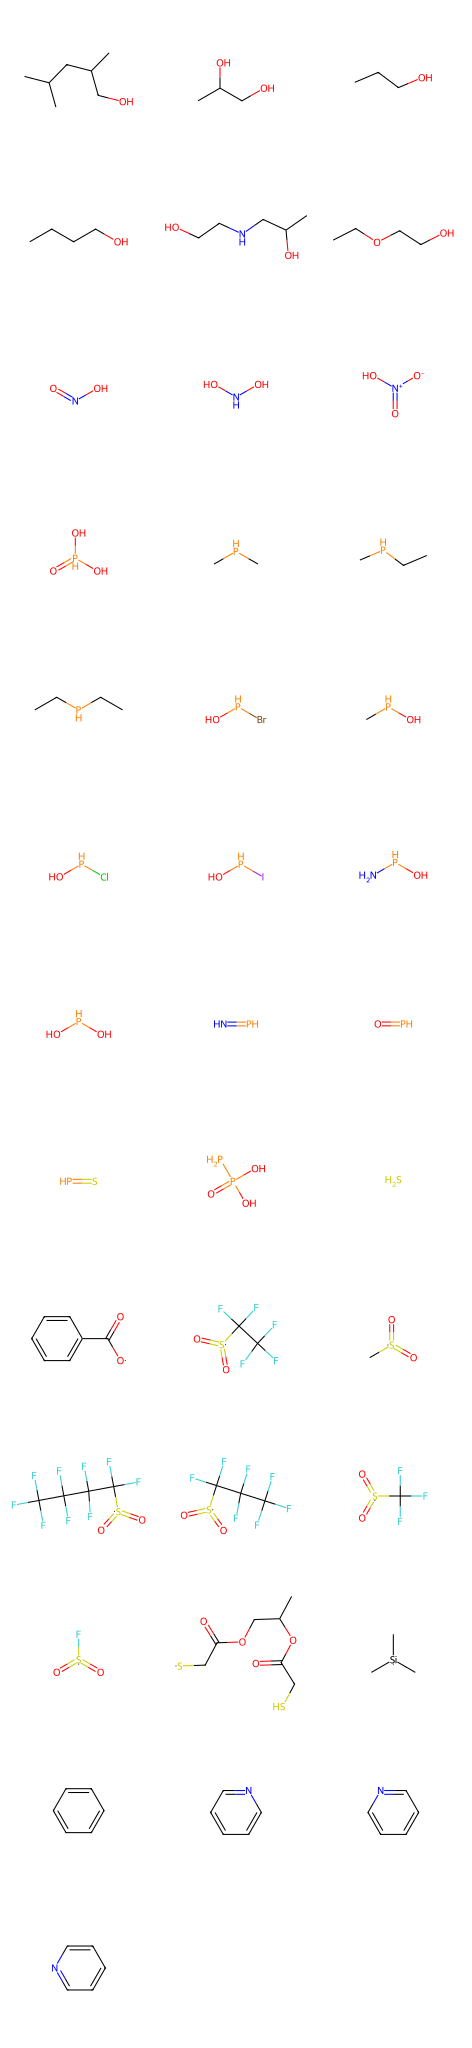

In [91]:
Chem.Draw.MolsToGridImage(sub_mols[200:], subImgSize=(300, 300))

In [6]:
import statistics
from pathlib import Path
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt


from rdkit import Chem
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from pymatgen.core.structure import Molecule
IPythonConsole.ipython_useSVG=True

In [17]:
base_dir = Path("/home/ewcss/data/omol24/20240521_small_mol_dump/xyzs")

data = {
    "num_atoms": list(),
    "num_heavy_atoms": list(),
    "charges": list(),
    "element_counts": defaultdict(int),
    "element_appearances": defaultdict(int)
}

for subdir in base_dir.iterdir():
    if not subdir.is_dir():
        continue

    print("ENTERING", subdir.name)
    for file in (base_dir / subdir).iterdir():
        if not file.name.endswith(".xyz"):
            continue

        mol = Molecule.from_file(base_dir / subdir / file)
        charge = int(file.name.split("_")[1])
        data["charges"].append(charge)
        num_atoms = len(mol)
        data["num_atoms"].append(num_atoms)

        num_heavy_atoms = 0
        species = [str(s) for s in mol.species]
        for s in species:
            if s != "H":
                num_heavy_atoms += 1
            data["element_counts"][s] += 1

        data["num_heavy_atoms"].append(num_heavy_atoms)
        for unique_s in set(species):
            data["element_appearances"][unique_s] += 1

ENTERING benzothiadizaole
ENTERING benzoquinone
ENTERING maleic_anhydride
ENTERING phthalimide
ENTERING phosphine
ENTERING cyclic_sulfate
ENTERING phenothiazine
ENTERING methanide
ENTERING pyrroline
ENTERING sulphonium
ENTERING phosphonium
ENTERING pyridazinium
ENTERING viologen
ENTERING organosulfate
ENTERING sulfonyl_fluoride
ENTERING boroxine
ENTERING piperazinium
ENTERING carbamate
ENTERING oxadiazine
ENTERING sulfonylimide
ENTERING quinoxaline
ENTERING hexahydroniobate
ENTERING linear_carbonate
ENTERING iosquinolinium
ENTERING lactam
ENTERING methanoate
ENTERING tetrahydrogalldate
ENTERING pyrimidine
ENTERING hexahydrophosphate
ENTERING acetate
ENTERING guanidinium
ENTERING glyme
ENTERING ammonium
ENTERING cyclic_carbonate
ENTERING tempo
ENTERING sulfite_ester
ENTERING methoxyalkylamine
ENTERING glycinate
ENTERING tetrahydroindate
ENTERING azanide
ENTERING anthraquinone
ENTERING piperidinium
ENTERING phosphorane
ENTERING 122-triazole
ENTERING pyrrolidinium
ENTERING imidazolidine
E

In [19]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
LARGE_SIZE=18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

Text(0, 0.5, 'Count')

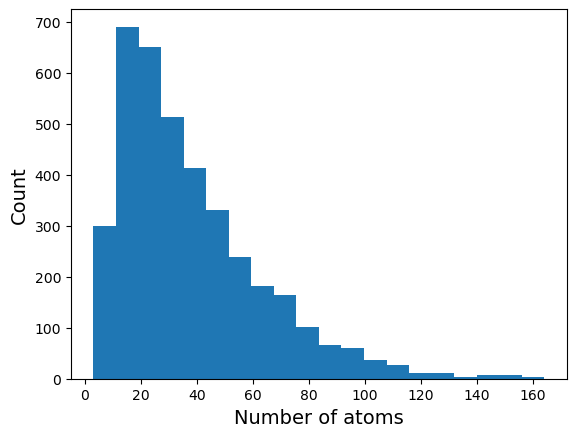

In [20]:
fig, ax = plt.subplots()
ax.hist(data["num_atoms"], bins=20)
ax.set_xlabel("Number of atoms")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

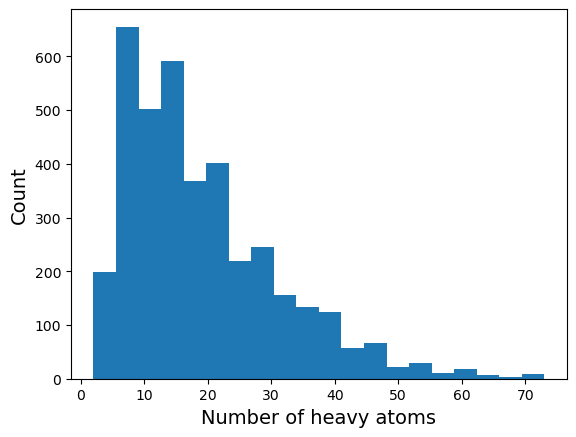

In [21]:
fig, ax = plt.subplots()
ax.hist(data["num_heavy_atoms"], bins=20)
ax.set_xlabel("Number of heavy atoms")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

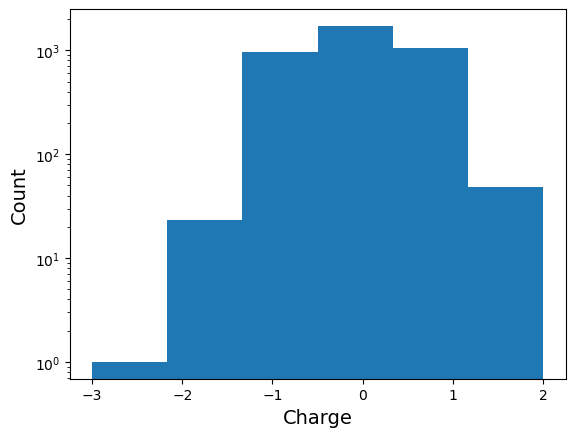

In [28]:
fig, ax = plt.subplots()
ax.hist(data["charges"], bins=6)
ax.set_yscale("log")
ax.set_xlabel("Charge")
ax.set_ylabel("Count")

<BarContainer object of 19 artists>

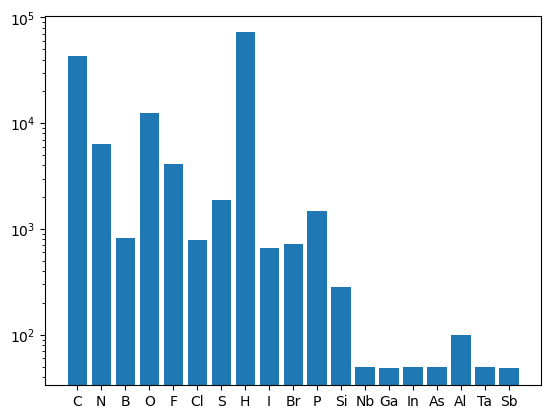

In [24]:
fig, ax = plt.subplots()
names = list(data["element_counts"].keys())
values = list(data["element_counts"].values())
ax.set_yscale("log")
ax.bar(range(len(names)), values, tick_label=names)

<BarContainer object of 19 artists>

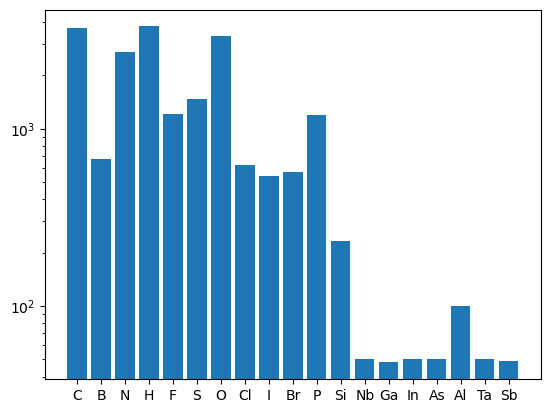

In [25]:
fig, ax = plt.subplots()
names = list(data["element_appearances"].keys())
values = list(data["element_appearances"].values())
ax.set_yscale("log")
ax.bar(range(len(names)), values, tick_label=names)